# Gaussian Naive Bayes: custom implementation vs scikit-learn

This notebook tests our implementation of the Gaussian Naive Bayes classifier and compares its performance with model provided by `scikit-learn`.

First, we import all required packages.

In [1]:
from GaussianNaiveBayes import GaussianNaiveBayes
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

### 1. Load and explore dataset

First, we load and explore the dataset. Since we will use a toydataset provided by sklearn, there is actually almost nothing to do.

In [2]:
# load dataset
wine_data = datasets.load_wine()

# print dataset description
print(wine_data.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 3. Split dataset into training and test sets

Now, we split the dataset into the training and test sets. Note that since, Naive Bayes doesn't require any hyperparamtere, we don't need any validation dataset.

In [3]:
# separate data into training and test sets. 
X_train, X_test, Y_train, Y_test = train_test_split(wine_data.data, wine_data.target, test_size=0.3)

## 4. Train and test our Gaussian Naive Bayes model

Now, we will train and test our implementation of Gaussian Naive Bayes. Please have a look to `NaiveBayes.py` for implementation details

In [4]:
# model construction
model = GaussianNaiveBayes(data=X_train, target=Y_train, feature_names=wine_data.feature_names)
model.fit()


# classify test samples
preds = [model.classify(x_test) for x_test in X_test]

In [5]:
# classification report
print("Classification Report for our implementation.")
print(classification_report(Y_test, preds))

Classification Report for our implementation.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.96      0.98        23
           2       0.94      1.00      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



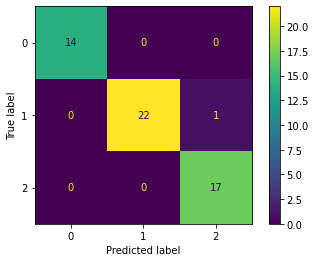

In [6]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, preds)

### 3. Comparison with scikit-learn implementation

Finally, we will compare the performance of our model with the Gaussian Naive Bayes implementation provided by scikit-learn.

In [7]:
# train scikit model
scikit_model = GaussianNB()
scikit_model.fit(X_train, Y_train)

# classify test samples
scikit_predictions =scikit_model.predict(X_test)

In [8]:
# Classification report
print("Classification Report for scikit-learn model.")
print(classification_report(Y_test, scikit_predictions))

Classification Report for scikit-learn model.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.96      0.98        23
           2       0.94      1.00      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



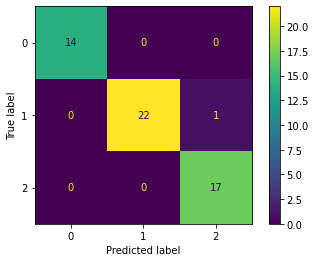

In [9]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, scikit_predictions)

As expected, we found the same classification report and confusion matrix.